In [1]:
import pandas as pd
import numpy as np

# plotting 
import plotly.express as px
import seaborn as sns

# embed images
from IPython.display import Image

# A) The Central Limit Theorem

In [2]:
rent = pd.read_csv('data/houses_to_rent.csv')['rent']

print(rent)

0       24000
1       20000
2       20000
3       20000
4       20000
        ...  
6074      500
6075      500
6076      500
6077      450
6078      420
Name: rent, Length: 6079, dtype: int64


##### Let's take a few random samples from this list of rent prices

In [3]:
rent.sample(5)

660     9500
1544    5800
2604    3600
5894     850
2921    3290
Name: rent, dtype: int64

In [4]:
# let's take a few random samples and calculate the mean 
rent.sample(30).mean()

4090.266666666667

In [6]:
# 10000 times?
means = [rent.sample(30).mean() for i in range(10000)]
    
# plot
fig = px.histogram(x=means, nbins=100)
fig.show()

# describe the distribution
mean = np.mean(means)
print('Mean: {:.3f} \n'.format(mean))

Mean: 4371.550 



In [10]:
# but wait, what is the actual undelying distribution of rent?

# plot
fig = px.histogram(x=rent, nbins=100)
fig.show()

# describe the distribution
mean = np.mean(means)
print('Mean: {:.3f} \n'.format(mean))

Mean: 4371.550 



#### Central Limit Theorem:
For some distribution with mean $\mu$ and (finite) variance $\sigma^2$, if you take the mean for N samples, then <br>
the distribution of the mean will approach
<br>
Norm($\mu$, $\frac{sigma}{\sqrt N}$) 
<br> 
as N -> $\infty$
<br><br>
"CLT is a statistical theory stating that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population." -
https://www.investopedia.com/terms/c/central_limit_theorem.asp

# B) Correlation

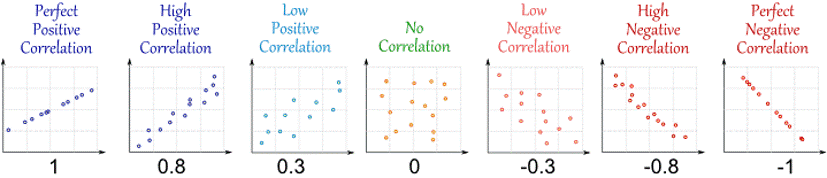

In [11]:
Image("img/correlation.gif")

#### Two Variables 

In [12]:
df = pd.read_csv('data/houses_to_rent.csv')[['area', 'rent']]
df

,area,rent
0,80,24000
1,285,20000
2,660,20000
3,315,20000
4,900,20000
...,...,...
6074,56,500
6075,30,500
6076,45,500
6077,60,450


In [13]:
px.scatter(df, x='area', y='rent')

In [14]:
df.corr()

,area,rent
area,1.000000,0.235894
rent,0.235894,1.000000


#### Multiple Variables 

In [15]:
df = pd.read_csv('data/houses_to_rent.csv')
df

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent,property_tax,fire_insurance,total
0,1,80,2,1,1,1,acept,not furnished,875,24000,0,305,25180
1,1,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
2,1,660,4,5,5,12,acept,furnished,4800,20000,1750,254,26800
3,1,315,3,5,2,14,not acept,not furnished,4300,20000,959,254,25510
4,1,900,3,4,8,-,acept,not furnished,0,20000,3813,301,24110
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6074,0,56,1,1,0,12,acept,not furnished,290,500,19,7,816
6075,0,30,1,1,0,15,acept,not furnished,280,500,10,7,797
6076,0,45,1,1,0,14,not acept,not furnished,285,500,0,7,792
6077,0,60,2,1,1,3,acept,not furnished,505,450,48,6,1009


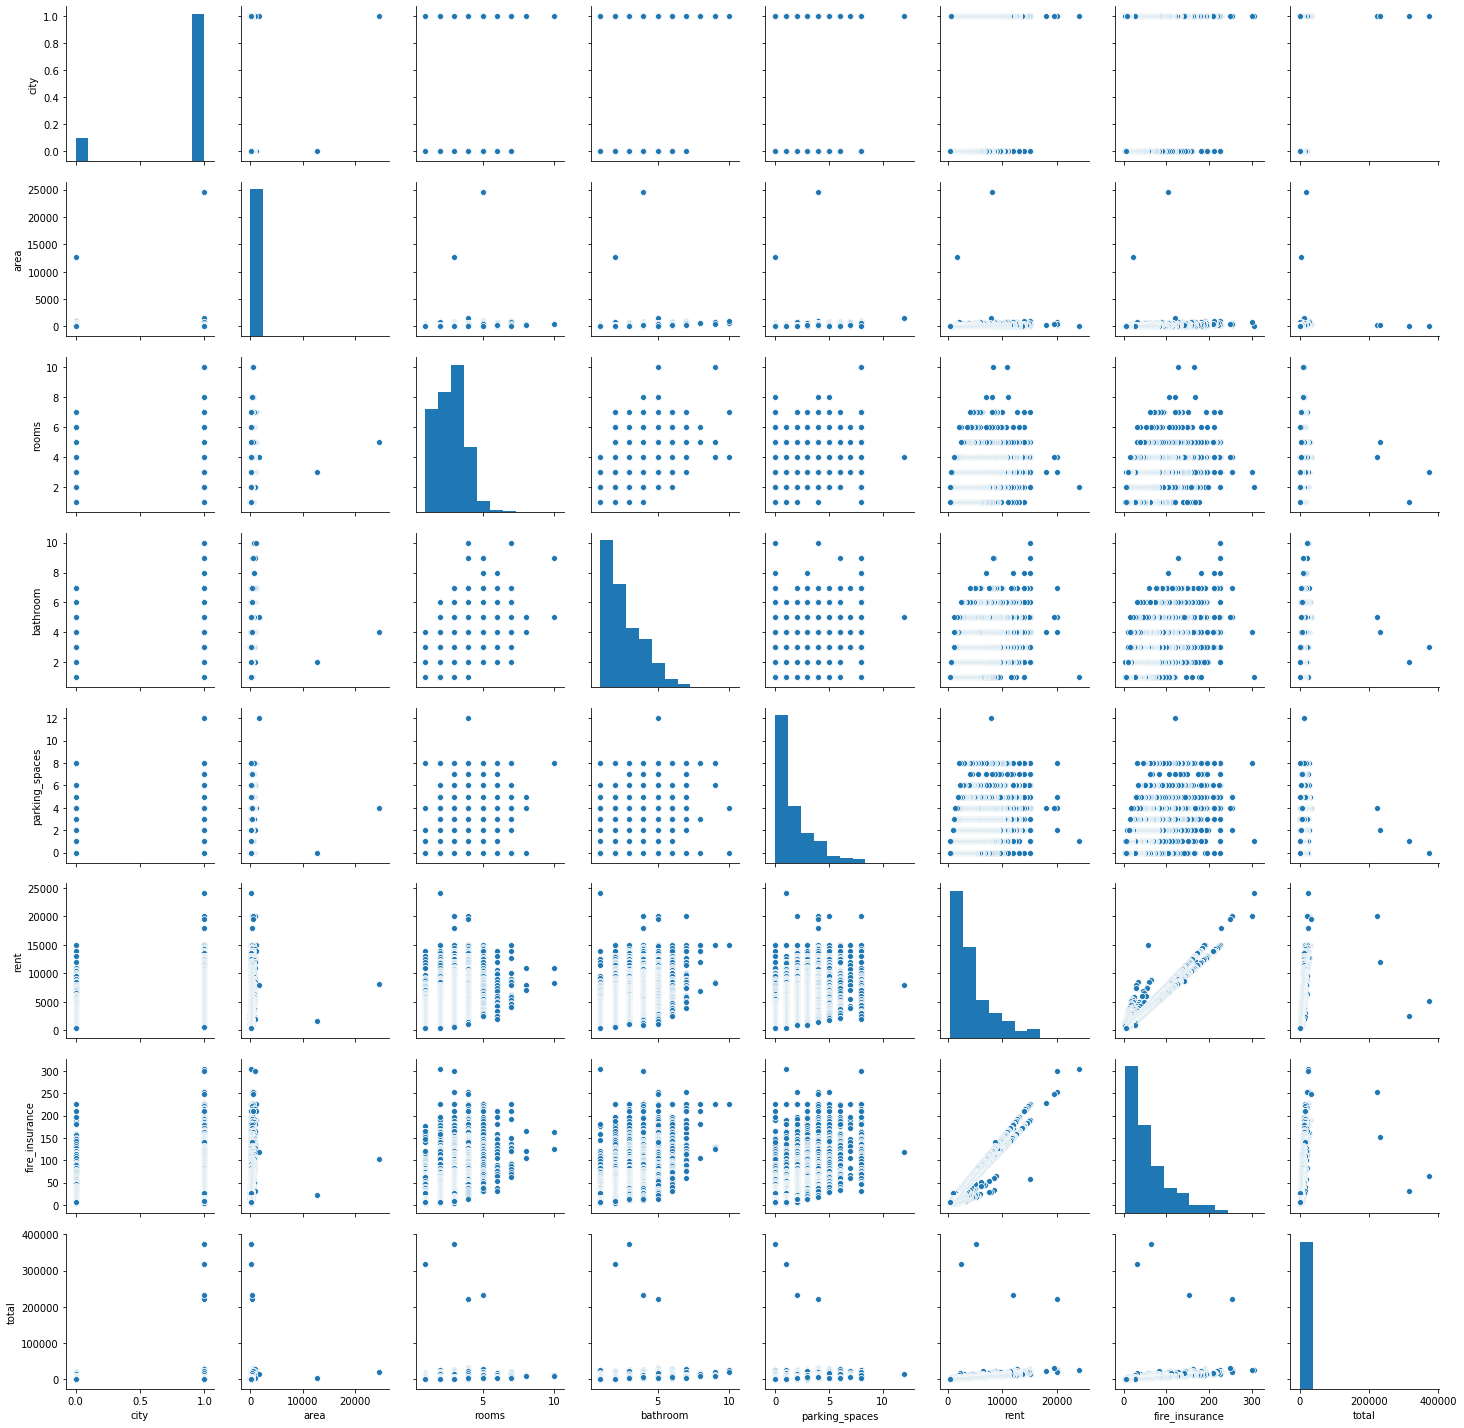

In [16]:
sns_pairplot = sns.pairplot(df)

In [17]:
df.corr()

,city,area,rooms,bathroom,parking_spaces,rent,fire_insurance,total
city,1.000000,0.007615,0.035249,0.089015,0.030812,0.211748,0.194079,0.121745
area,0.007615,1.000000,0.266722,0.274992,0.251916,0.235894,0.247690,0.140112
rooms,0.035249,0.266722,1.000000,0.746919,0.624985,0.536842,0.560602,0.309777
bathroom,0.089015,0.274992,0.746919,1.000000,0.685252,0.656896,0.667480,0.385210
parking_spaces,0.030812,0.251916,0.624985,0.685252,1.000000,0.576119,0.601987,0.311619
rent,0.211748,0.235894,0.536842,0.656896,0.576119,1.000000,0.985673,0.539659
fire_insurance,0.194079,0.247690,0.560602,0.667480,0.601987,0.985673,1.000000,0.521054
total,0.121745,0.140112,0.309777,0.385210,0.311619,0.539659,0.521054,1.000000
